# Experiment No.4 Transformer-based Generative Models

**Name: Nabil Ansari** \
**PRN: 202302040004** \
**Colab Link:** https://colab.research.google.com/drive/1DeHP3e0faPYSr9DrKu2IdKiEkXz3VL9_?usp=sharing

# Part 1. Generate text using an GPT model.


## Identifing a suitable open-source gpt model

Research and choose an open-source GPT model that meets your requirements (e.g., model size, performance, license). Popular options include models from Hugging Face's Transformers library.


In [ ]:
chosen_model_name = "gpt2"
print(f"Chosen open-source GPT model: {chosen_model_name}")

Chosen open-source GPT model: gpt2


## Set up the environment


Install necessary libraries like `transformers`, `torch` or `tensorflow`, and potentially `accelerate` for better performance.


In [ ]:
%pip install transformers torch accelerate

## Load the model and tokenizer

Load the chosen model and its corresponding tokenizer from the Hugging Face Hub or a local path.


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

## Generate text
Use the loaded model and tokenizer to generate text based on a given prompt.


In [ ]:
prompt = "What is Machine Learning?"
inputs = tokenizer(prompt, return_tensors="pt")
generated_ids = model.generate(inputs.input_ids, max_length=100, num_return_sequences=1, no_repeat_ngram_size=2, do_sample=True)
generated_text = tokenizer.decode(generated_ids[0], skip_special_tokens=True)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
print("Output:")
print(generated_text)

Output:
What is Machine Learning?

Machine learning is a way to build new models and algorithms on top of existing methods. As we saw before, a large number of model models use data structures to organize objects, but most of them are based on data about the world. An important characteristic of such models is the ability for the model to represent itself as a data structure in a manner useful for machine learning. So many of the methods used for this are pretty much the same. What makes Machinelearning approach


# Part 2: Generate images based on text prompts using an open-source text-to-image model.

## Set up the environment for text-to-image generation


Install necessary libraries for text-to-image models, such as `diffusers`, `transformers`, and `accelerate`.


In [ ]:
%pip install diffusers transformers accelerate

## Load a text-to-image model
Choose and load a suitable open-source text-to-image model (e.g., from the Diffusers library) and its corresponding tokenizer.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## Generate an image from a text prompt


Use the loaded model to generate an image based on a given text prompt.


In [ ]:
if torch.cuda.is_available():
    pipe = pipe.to("cuda")
prompt = "A photo of an astronaut riding a horse on the moon."
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

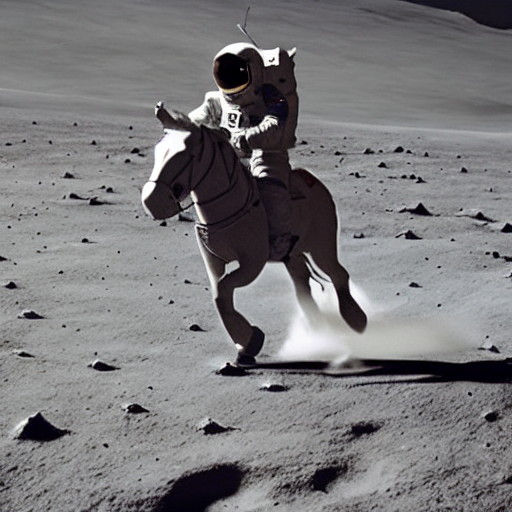

In [ ]:
display(image)